# <center>Ti/TiOx/Graphene junction</center>
<hr>

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import minimize 
from scipy.interpolate import interp1d
from  matplotlib import pyplot as plt
import matplotlib

# special functions

from scipy.special import voigt_profile

# supress warning as a best practice 

import warnings
warnings.filterwarnings("ignore")

# %matplotlib notebook

# If you don't have pdflatex installed, remove the update call below.
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'font.size': 14,
#     'toolbar': 'None',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
#     'legend.fancybox': False,
#     'legend.shadow': False,
#     'figure.figsize': (6, 5)
# })

### Physical Constants

In [2]:
h_bar = 6.58211899e-16 # reduced Planck constant [eV . s]
h = 2 * np.pi * h_bar
h_SI = 6.62607015e-34 # [m^2 . kg / s]
c = 29979245800e8 # speed of light in [Angstrom / s]
c_cm = c * 1e-8 # speed of light in [cm / s]
mo = 5.685629658548379204e-16 # electron rest mass [eV / (cm/s)^2]
me = 9.1093837015e-31 # electron rest mass [kg]
qel = 1.60219e-19 # elementary charge [C]
angstrom = 1e-8 # [cm]
k_B = 8.617343e-5 # Boltzmann constant [eV / K]
eps_0 = 552635 # [e / (V.cm)]
eps_0_SI = 8.85418782e-14 # [F / cm] 

### Graphene parameters

In [3]:
a = 1.42e-8 # lattice parameter [cm]
the = 2.8 # Hopping energy [eV]
vF = 3 * the * a / (2 * h_bar) # Fermi velocity [cm / s]
n0 = 5e11 # Minimum sheet carrier concentration [cm^-2], Xia 2011

### Induced carrier in graphene due to the gate voltage

In [4]:
CQ = lambda EF : 2 * EF * 1**2 / (np.pi * h_bar**2 * vF) # quantum capacitance of graphene monolayer
CG = lambda tox : 3.9 * eps_0 / (tox * 1e-7) # effective gate capacitance per unit area, tox [nm]
n0G = lambda tox, VGD : - CG(tox) * VGD # 2D charge density [# / cm^2]
nt0Gch = lambda tox, Vg : n0G(tox, Vg) # net carrier density in the graphene channel

# x = np.linspace(-40, 40)
# plt.figure()
# plt.plot(x, nt0Gch(90, x))
# plt.title(r'Induced carrier in graphene due to the $V_{G}$')
# plt.xlabel(r'$V_{G}$ [V]')
# plt.ylabel('Net carrier density [#/cm$^{2}$]')
# plt.grid()

### Density of state per unit cell in graphene

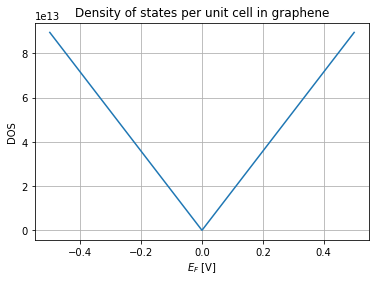

In [5]:
gv = 2 # valley degeneracy 
gs = 2 # spin degeneracy

DOS = lambda x : gv * gs * np.abs(x) / (2 * np.pi * (h_bar * vF)**2) 

x = np.linspace(-0.5, 0.5, 1000)
plt.figure()
plt.plot(x, DOS(x))
plt.title('Density of states per unit cell in graphene')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('DOS')
plt.grid()

### Carrier density in an ideal graphene channel (GC) as a function of Fermi energy

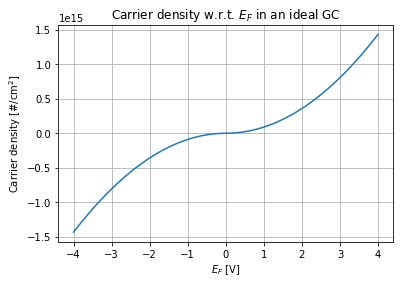

In [6]:
QGC = lambda EF : np.array([integrate.quad(DOS, 0, EF)[0] for EF in EF])

x = np.linspace(-4, 4, 1000)
plt.figure()
plt.plot(x, QGC(x))
plt.title(r'Carrier density w.r.t. $E_{F}$ in an ideal GC')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
plt.grid()

### Fermi Level as a function of gate voltage

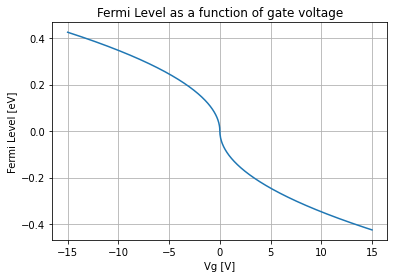

In [7]:
FL_VG = lambda tox, VGD : - VGD * h_bar * vF * np.sqrt(np. pi / 1) * np.sqrt(CG(tox) * np.abs(VGD)) / np.abs(VGD)

x = np.linspace(-15, 15, 1000)
plt.figure()
plt.plot(x, FL_VG(20, x))
plt.title('Fermi Level as a function of gate voltage')
plt.xlabel('Vg [V]')
plt.ylabel('Fermi Level [eV]')
plt.grid()

### Number of distinct transversal modes in graphene

\begin{equation}
    M = \frac{\phi_{c,i}(t_{ox}, V_{G})}{\pi\ \hbar\ v_{F}} W
\end{equation}

In [8]:
Mt = lambda tox, W, Vg : np.abs(FL_VG(tox, Vg) * W / (np.pi * h_bar * vF)) 

### Ideal contact resistance for a graphene channel

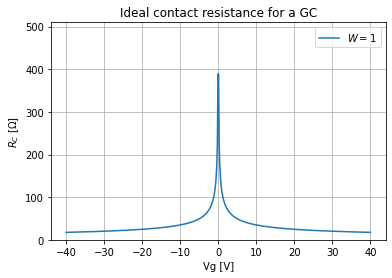

In [9]:
R0c = lambda tox, W, Vg : (h * W * 1e4) / (gv * gs * 1**2 * Mt(tox, W, Vg) * qel) 

Vg = np.linspace(-40, 40, 500)
plt.figure()
plt.plot(Vg, R0c(20, 5, Vg), label=f"$W={1}$")
plt.title('Ideal contact resistance for a GC')
plt.xlabel('Vg [V]')
plt.ylabel('$R_{C}$ [$\Omega$]')
plt.ylim([0, 510])
plt.grid()
plt.legend()
plt.show()

## Ideal Metal-Graphene junction resistance of a (Gaussian) broadened graphene channel

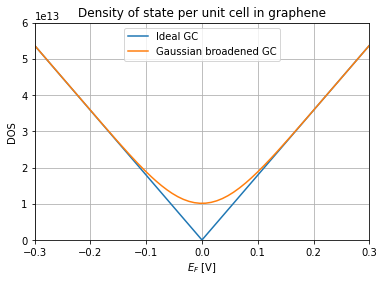

In [10]:
# Gaussian broadening of the DOS
t2 = 0.1 # Gaussian broadening of the DOS 

DsGauss = lambda E :  (2 / (np.pi * (h_bar * vF)**2)) \
                * integrate.quad(lambda Em : np.exp(-(Em - E)**2 / t2**2) * np.abs(Em) / (t2 * np.sqrt(np.pi)), \
                                 E - 6 * t2, E + 6 * t2)[0]

DsGauss1 = [DsGauss(x) for x in np.linspace(-2, 2, 400)]
DsGG = interp1d(np.linspace(-2, 2, 400), DsGauss1)

x = np.linspace(-0.5, 0.5, 1000)
plt.figure()
plt.plot(x, DOS(x), label='Ideal GC')
plt.plot(x, DsGG(x), label='Gaussian broadened GC')
plt.title('Density of state per unit cell in graphene')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('DOS')
plt.xlim([-.3, .3])
plt.ylim([0, 6e13])
plt.legend()
plt.grid()


# test_func = lambda E : integrate.quad(lambda Em : np.exp(-(Em - E)**2 / t2**2) * np.abs(Em) / (t2 * np.sqrt(np.pi)), \
#                                  E - 60 * t2, E + 60 * t2)[0]

# print(test_func(0.0005))

In [11]:
ne = lambda EF, T : integrate.quad(lambda x : DsGG(x) * (np.exp((x - (-EF))/(k_B * T)) + 1)**(-1), 0, 2)[0]
nh = lambda EF, T : integrate.quad(lambda x : DsGG(x) * (np.exp(((-EF) - x)/(k_B * T)) + 1)**(-1), -2, 0)[0]

# nh = lambda EF, T : np.array([integrate.quad(DsGauss * (np.exp(((-EF) - x)/(k_B * T)) + 1)**(-1), EF, 0)[0] for EF in np.linspace(-2, 0, 100)])

print(f"{ne(0.1, 300):.5e}")
print(f"{nh(0.1, 300):.5e}")

qeh = lambda EF, T : -ne(EF, T) + nh(EF, T)
neh = lambda EF, T : ne(EF, T) + nh(EF, T)

print(f"Total charge/carriers density qeh = {qeh(0.1, 300):.5e} and neh = {neh(0.1, 300):.5e}")


# x = np.linspace(-0.4, 0.4, 100)
# plt.figure()
# plt.plot(x, QGC(x), label='Ideal GC')
# plt.plot(x, QGG(x), label='Gaussian broadened GC')
# plt.title('Carrier density w.r.t. $E_{F}$ in a GC')
# plt.xlabel(r'$E_{F}$ [V]')
# plt.ylabel('Carrier density [#/cm$^{2}$]')
# plt.legend()
# plt.grid()

6.06162e+09
1.47904e+12
Total charge/carriers density qeh = 1.47297e+12 and neh = 1.48510e+12


### Fermi Level in a Gaussian broadened graphene channel as a function of gate voltage

How to determine the effective metal-equilibrium distance in the case of Ti?

In [12]:
toxch = 20
tox = toxch + 0.1 # tox -> Thickness of the gate oxide under the channel + the effective metal-equilibrium distance PRL 2008 [nm]

def get_DEFGCG(Vgd_max, n=40):
    
    V = np.linspace(-Vgd_max, Vgd_max, n)
    Ef = np.zeros((n,))
    
    for idx, x in enumerate(V):
        
        guess = FL_VG(toxch, x)
        Ef[idx] = minimize(lambda Ef : np.abs(qeh(Ef, 1) + (CG(toxch) * x)), guess).x
    
    return interp1d(V, Ef)


DEFGCG = get_DEFGCG(40)

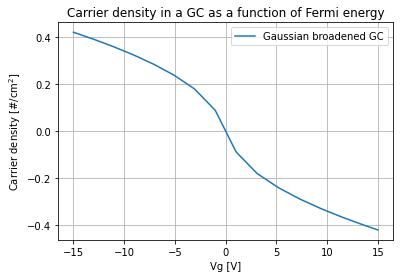

In [13]:
x = np.linspace(-15, 15, 500)

plt.figure()
plt.plot(x, DEFGCG(x), label="Gaussian broadened GC")
plt.title('Carrier density in a GC as a function of Fermi energy')
plt.xlabel('Vg [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
# plt.ylim([-.4, .4])
plt.grid()
plt.legend()
plt.show()

### Number of distinct transversal modes in graphene


In [14]:
Vg = np.linspace(-40, 40, 500)

MtG = lambda Vgs: integrate.quad(lambda Em : (np.exp(-(Em - DEFGCG(Vgs))**2 / t2**2) / (t2 * np.sqrt(np.pi)) \
                               * np.floor( np.abs(Em) * 1e-4 / (np.pi * h_bar * vF))), -3, 3)[0]

MTGC = interp1d(Vg, [MtG(Vg) for Vg in Vg])

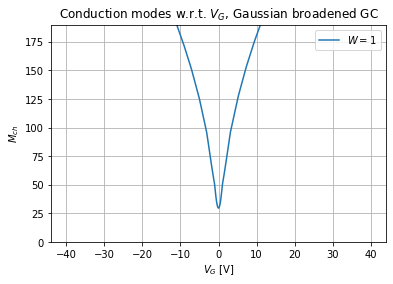

In [15]:
plt.figure()
plt.plot(Vg, MTGC(Vg), label=r'$W=1$')
plt.title('Conduction modes w.r.t. $V_{G}$, Gaussian broadened GC')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$M_{ch}$')
plt.ylim([0, 190])
plt.legend()
plt.grid()

### Contact Resistance in an ideal metal–graphene junction

In [16]:
RctGF = lambda Vgs : h / (2 * 2 * 1**2 * MTGC(Vgs) * qel) # Contact Resistance in an ideal metal–graphene junction

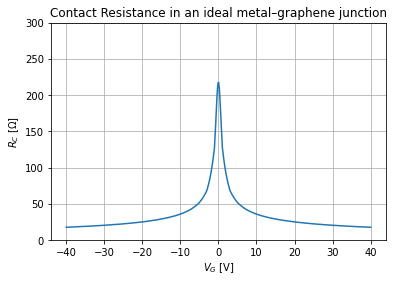

In [17]:
plt.figure()
plt.plot(Vg, RctGF(Vg))
plt.title('Contact Resistance in an ideal metal–graphene junction')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$R_{C}$ [$\Omega$]')
plt.ylim([0, 300])
plt.grid()
plt.show()

# Graphene under metal

### Gaussian broadened DOS in the graphene-under-metal

In [18]:
tm = 0.2

DsGaussm = lambda E :  (1 * 2 / (np.pi * (h_bar * vF)**2)) \
                * integrate.quad(lambda Em : np.exp(-(Em - E)**2 / tm**2) * np.abs(Em) / (tm * np.sqrt(np.pi)), E - 3 * tm, E + 3 * tm)[0]

DsGauss1m = [DsGaussm(x) for x in np.linspace(-2, 2, 400)]
DsGGm = interp1d(np.linspace(-2, 2, 400), DsGauss1m)

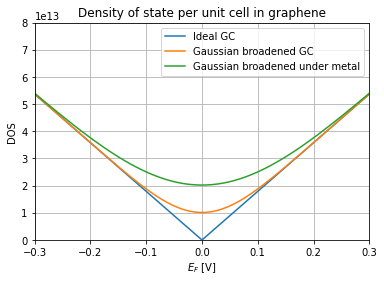

In [19]:
x = np.linspace(-0.5, 0.5, 1000)
plt.figure()
plt.plot(x, DOS(x), label='Ideal GC')
plt.plot(x, DsGG(x), label='Gaussian broadened GC')
plt.plot(x, DsGGm(x), label='Gaussian broadened under metal')
plt.title('Density of state per unit cell in graphene')
plt.xlabel(r'$E_{F}$ [V]')
plt.ylabel('DOS')
plt.xlim([-.3, .3])
plt.ylim([0, 8e13])
plt.legend()
plt.grid()

### Carriers/Charge density in the graphene-under-metal

In [20]:
nem = lambda EF, T : integrate.quad(lambda x : DsGGm(x) * (np.exp((x - (-EF)) / (k_B * T)) + 1)**(-1), 0, 2)[0]
nhm = lambda EF, T : integrate.quad(lambda x : DsGGm(x) * (np.exp(((-EF) - x) / (k_B * T)) + 1)**(-1), -2, 0)[0]

print(f"Electrons density in the conduction band nem = {nem(0.1, 300):.5e} #/cm^(-2)")
print(f"Holes density in the valence band nhm = {nhm(0.1, 300):.5e} #/cm^(-2)")

qehm = lambda EF, T : -nem(EF, T) + nhm(EF, T)
nehm = lambda EF, T : nem(EF, T) + nhm(EF, T)

print(f"Total charge/carriers density qehm = {qehm(0.1, 300):.5e}, nehm = {nehm(0.1, 300):.5e}")

Electrons density in the conduction band nem = 1.11533e+10 #/cm^(-2)
Holes density in the valence band nhm = 2.29481e+12 #/cm^(-2)
Total charge/carriers density qehm = 2.28365e+12, nehm = 2.30596e+12


### Modulated Fermi-energy in the graphene-under-metal

In [21]:
CM = lambda d, eps_r=1 : eps_0 * eps_r / (d * 1e-8) # metal-graphene coupling capacitance

deq = 3 # Approximate effective metal-graphene distance [angstrom]
d1 = 1 # Effective electrostatic distance between metal and graphene underneath [angstrom]
dTi = 5 # [angstrom], Wang2021
W = 4.3 # Work function for the Pd surfaces with adsorbed graphene [eV]

### Fermi-level shift/Charge transfer due to the metal contact doping [Doping graphene with metal contacts, PRL 2008]

In [22]:
WG = 4.5 # Graphene work function [eV]
WPd = 5.67 # Palladium work function [eV]
WCu = 5.22 # ...
WAlCu = 4.4
WAl = 4.22
WTi = 4.3

In [23]:
deqPd = 2.4
deqCu = 3.26
deqAl = 3.41
deqAlCu = 3.3844
deqWti = -1

In [60]:
A = 5.18 # Area of the graphene unit cell [Angstrom^2]
d0 = 2.4 # From the fitting ??? [Angstrom]

alpha_0 = 1**2 / (eps_0 * 1e-8 * A) # From the charge transfer contribution in the plane capacitor model [eV/cm]
D0 = (2 / np.pi) * (h_bar * vF * 1e8)**(-2) * A # Density of states per unit cell 

# Contribution from the metal-graphene chemical interaction (for weak metal-graphene interaction)

k = 1.6443 # [angstrom^-1]
a0 = -2048.56 # [eV]
a1 = 1363.87 # [eV / angstrom]
a2 = -205.737 # [eV / angstrom]
delc = lambda d : np.exp(-k * d) * (a0 + (a1 * d) + (a2 * d**2)) # where d is the separation between the graphene
                                                                 # sheet and the metal surace [eV]

DEF = lambda WM, d : np.sign(WM - WG - delc(d)) * (np.sqrt(1 + (2 * alpha_0 * D0 * (d-d0) * np.abs(WM - WG - delc(d)))) - 1) \
                    / (alpha_0 * D0 * (d-d0)) # E_Dirac - E_Fermi [eV]

deltr = lambda WM, d, d1 : alpha_0 * D0 * DEF(WM, d)**2 * d1 / 2 # contribution from the metal-graphene 
                                                                 # "noninteracting" potential
    
Ntrm = lambda WM, d : np.sign(DEF(WM, d)) * D0 * DEF(WM, d)**2 / 2 # Number of electrons (per unit cell) transferred 
                                                                   # from graphene to the metal (becoming negative if 
                                                                   # electrons are transferred from the metal to the graphene) 

In [68]:
# print(delc(3.41))
# print(delc(2.4))
# print(delc(2.05))
# print(delc(2.1))

0.77074183523682
0.7668990219265025
-4.028427356536239
-2.90331746570174


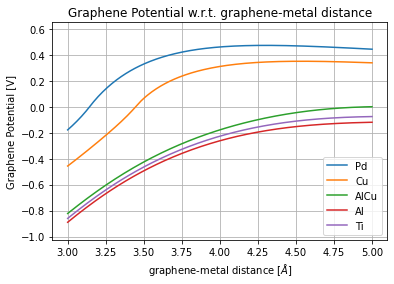

In [25]:
d = np.linspace(3, 5, 200)

DEFPd = [DEF(WPd, d) for d in d]
DEFCu = [DEF(WCu, d) for d in d]
DEFAlCu = [DEF(WAlCu, d) for d in d]
DEFTi = [DEF(WTi, d) for d in d]
DEFAl = [DEF(WAl, d) for d in d]

plt.figure()
plt.plot(d, DEFPd, label='Pd')
plt.plot(d, DEFCu, label='Cu')
plt.plot(d, DEFAlCu, label='AlCu')
plt.plot(d, DEFAl, label='Al')
plt.plot(d, DEFTi, label='Ti')
plt.title('Graphene Potential w.r.t. graphene-metal distance')
plt.xlabel('graphene-metal distance [$\AA$]')
plt.ylabel('Graphene Potential [V]')

plt.ylim([-1.025, 0.65])
plt.legend()
plt.grid()
plt.show()

In [26]:
print(DEF(WPd, deq)) # In good agreement with Fernando's code

-0.17836078315088594


### Fermi-level shift due to the metal contact doping

In [27]:
# CG = lambda tox : 3.9 * eps_0 / (tox * 1e-7) # effective gate capacitance per unit area, tox [nm]

def get_DEFMGT0(Vg_max, n=20, d=d1, tox=tox):

    V = np.linspace(-Vg_max, Vg_max, n)
    phi_m = np.zeros((n,))
#     phi_m2 = np.zeros((n,))
    

    for idx, x in enumerate(V):

#         phi_m[idx] = minimize(lambda phi_m : np.abs(qehm(phi_m, 1) + CG(tox) * x - (CG(tox) + CM(d, eps_r=6.9)) * 0.098), 0, bounds=[(-1.1, 1.1)]).x
        phi_m[idx] = minimize(lambda phi_m : np.abs(qel * qehm(phi_m, 1) -  eps_0 * 6.9 * (WTi - WG - phi_m) / (dTi)), 0, bounds=[(-1.1, 1.1)]).x
        
        
    return interp1d(V, phi_m)


def get_DEFM_quad(Vgd_max, n=20, d=d1, tox=tox):
    
    Vgd = np.linspace(-Vgd_max, Vgd_max, n)
    DEF = np.zeros((n,))
        
    for idx, vgd in enumerate(Vgd):

        DEF[idx] = minimize(lambda dEf : np.abs(qehm(dEf, 1) + CG(tox) * vgd - (CG(tox) + CM(d, eps_r=6.9)) * 0.098), 0, bounds=[(-1.1, 1.1)]).x
        
    return interp1d(Vgd, DEF)

DEFMGT0Ti = get_DEFMGT0(15, d=dTi, tox=20)

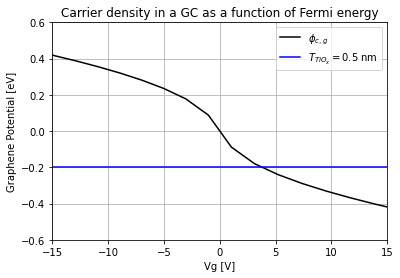

In [28]:
x = np.linspace(-15, 15, 1000)

plt.figure()
plt.plot(x, DEFGCG(x), 'k', label="$\phi_{c,g}$")
plt.plot(x, DEFMGT0Ti(x),'b', label="$T_{TiO_{x}} = 0.5$ nm")
# plt.plot(x, DEFMGT0Ti2(x),'r', label="$T_{TiO_{x}} = 0.5$ nm")
plt.title('Carrier density in a GC as a function of Fermi energy')
plt.xlabel('Vg [V]')
plt.ylabel(r'Graphene Potential [eV]')
plt.ylim([-.6, .6])
plt.xlim([-15, 15])
plt.grid()
plt.legend()
plt.show()

-0.425361600254508
7.926235051033622
22.12394935822344


(-0.5, 0.6)

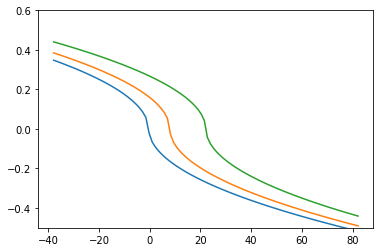

In [29]:
# import complex math module
import cmath
  
vF = 1e8

def solve_ggdirac(T, tox, Q0=0):
    
    # sheet charges inside graphene is set to 0 for now

    # Silicon paramters
    chi = 4.05
    ni = lambda T : 3.78e16 * T**(3/2) * np.exp(-7014/T) # intrisic concentration [cm^-3]
    NA = 2e19 # Si doping [cm^-3]
    Eg = 1.14 # Si band gap [eV]
    psiBp = k_B * T * np.log(NA/ni(T)) 
    
    return (chi + Eg / 2 - psiBp - WG - Q0 / CG(tox))


def solve_ggpot(Vg, VD, tox):
    
    a = np.sign(VD-Vg)/ (np.pi * h_bar**2 * vF**2)
    b = CG(tox)
    c = CG(tox) * (Vg - VD)

    # calculating  the discriminant
    dis = (b**2) - (4 * a*c)

    # find two results
    ans1 = (-b-cmath.sqrt(dis))/(2 * a)
    ans2 = (-b + cmath.sqrt(dis))/(2 * a)
      
    return ans2

def solvemin_ggpot(Vg, VD, tox):
    
    
    EFM = minimize(lambda EFM : np.abs(np.sign(EFM) * EFM**2 / (np.pi * h_bar**2 * vF**2) + \
                                       CG(tox) * EFM + \
                                       CG(tox) * (Vg - VD)), 0, bounds=[(-1.1, 1.1)]).x

    return EFM


tox = 90
VDgg0 = solve_ggdirac(300, tox)
VDgg1 = solve_ggdirac(300, tox, Q0=-2e12)
VDgg2 = solve_ggdirac(300, tox, Q0=-5.4e12)


print(VDgg0)
print(VDgg1)
print(VDgg2)


Vg = np.linspace(VDgg2-60, VDgg2+60, 100)

# DEF_tgg = [solve_ggpot(Vg, VDgg, tox) for Vg in Vg]
DEFgg0 = [solvemin_ggpot(Vg, VDgg0, tox) for Vg in Vg]
DEFgg1 = [solvemin_ggpot(Vg, VDgg1, tox) for Vg in Vg]
DEFgg2 = [solvemin_ggpot(Vg, VDgg2, tox) for Vg in Vg]


# print(DEF)

plt.figure()
plt.plot(Vg, DEFgg0)
plt.plot(Vg, DEFgg1)
plt.plot(Vg, DEFgg2)

# plt.plot(Vg - VDgg, DEF_tgg)

plt.ylim([-0.5, 0.6])

# plt.plot(Vg, DEFGCG(Vg), 'k', label="$\phi_{c,g}$")

Technique to compute the graphene potentials using Chaves technique:

42.22320494134999


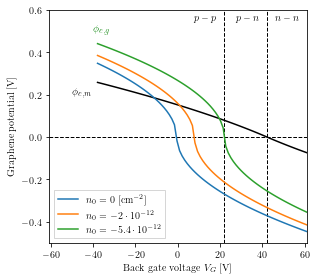

In [30]:
def solve_gmdirac(WM, T, deq, tox, eps_r_mox=1):
    
    # sheet charges inside graphene is set to 0 for now
    Q0 = -5.4e12
    delc = 0.9
    
    # Silicon paramters
    chi = 4.05
    ni = lambda T : 3.78e16 * T**(3/2) * np.exp(-7014/T) # intrisic concentration [cm^-3]
    NA = 2e19 # Si doping [cm^-3]
    Eg = 1.14 # Si band gap [eV]
    psiBp = k_B * T * np.log(NA/ni(T)) 
    
    return (CM(deq, eps_r=eps_r_mox) / CG(tox)) * (WM - WG - delc) + (chi + Eg / 2 - psiBp - WG - Q0 / CG(tox))


def solve_gmpot(Vg, VD, WM, deq, tox, eps_r_mox=1):
    
    a = np.sign(VD-Vg)/ (np.pi * h_bar**2 * vF**2)
    b = CM(deq, eps_r=eps_r_mox) + CG(tox)
    c = CG(tox) * (Vg - VD)

    # calculating  the discriminant
    dis = (b**2) - (4 * a*c)

    # find two results
    ans1 = (-b-cmath.sqrt(dis))/(2 * a)
    ans2 = (-b + cmath.sqrt(dis))/(2 * a)
      
    return ans2

def solvemin_gmpot(Vg, VD, WM, deq, tox, eps_r_mox=1):
    
    
    EFM = minimize(lambda EFM : np.abs(np.sign(EFM) * EFM**2 / (np.pi * h_bar**2 * vF**2) + \
                                       (CM(deq, eps_r=eps_r_mox) + CG(tox)) * EFM + \
                                       CG(tox) * (Vg - VD)), 0, bounds=[(-1.1, 1.1)]).x

    return EFM


tox = 90
VD = solve_gmdirac(WPd, 300, 3.1, tox)

print(VD)

DEF_t = [solve_gmpot(Vg, VD, WPd, 1, tox) for Vg in Vg]
DEF = [solvemin_gmpot(Vg, VD, WPd, 1, tox) for Vg in Vg]

# print(DEF)

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 10,
    'toolbar': 'None',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'legend.fancybox': False,
    'legend.shadow': False,
})
plt.figure(figsize=(4.5, 4))

plt.text(VDgg2 - 15, 0.55,'$p - p$')
plt.text(42.2 - 15, 0.55,'$p - n$')
plt.text(61 - 15, 0.55,'$n - n$')
plt.text(-50, 0.2, '$\phi_{c,m}$')
plt.text(-40, 0.5, '$\phi_{c,g}$', color='green')

# circle1 = plt.Circle(-50, 0.4, 0.2, color='b', fill=False)
# plt.gca().add_patch(circle1)

plt.axvline(42.2, linewidth=1, color='k', linestyle='dashed')
plt.axvline(VDgg2, linewidth=1, color='k', linestyle='dashed')
plt.axhline(0, linewidth=1, color='k', linestyle='dashed')

plt.plot(Vg, DEF, '-k',   markersize=4)
plt.plot(Vg, DEFgg0, '-', markersize=4, label="$n_{0}=0$ [cm$^{-2}$]")
plt.plot(Vg, DEFgg1, '-', markersize=4, label="$n_{0}=-2 \cdot 10^{-12}$")
plt.plot(Vg, DEFgg2, '-', markersize=4, label="$n_{0}=-5.4 \cdot 10^{-12}$")
plt.ylabel("Graphene potential [V]")
plt.xlabel('Back gate voltage $V_{G}$ [V]')
plt.ylim([-0.5, 0.6])
plt.xlim([-61, 61])
plt.legend()
plt.tight_layout()
# plt.plot(Vg, DEFGCG(Vg), 'k', label="$\phi_{c,g}$")

VDgg0 = solve_ggdirac(300, tox)
VDgg1 = solve_ggdirac(300, tox, Q0=-2e12)
VDgg2 = solve_ggdirac(300, tox, Q0=-5.4e12)
plt.savefig('graphpotpall.pgf')

Disorder $t$ in the graphene:

In [31]:
print(h_bar * vF * np.sqrt(np.pi * 5e11))

0.08249462783659822


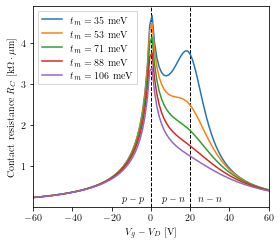

In [32]:
tg = 0.08249462783659822
tm = np.array([0.05, 0.075, 0.1, 0.125, 0.15]) / np.sqrt(2)
# tm = np.array([0.025])

W = 2e-4 # [cm]

plt.figure(figsize=(4, 3.5))
plt.axvline(42.2 - VDgg2, linewidth=1, color='k', linestyle='dashed')
plt.axvline(0, linewidth=1, color='k', linestyle='dashed')
plt.text(- 15, 0.15,'$p - p$')
plt.text(42.2- VDgg2 - 15, 0.15,'$p - n$')
plt.text(61 - VDgg2 - 15, 0.15,'$n - n$')
# W / (np.pi * h_bar * vF)

for _, tm in enumerate(tm):

    
#     intM1 = lambda DEFm, Eg : integrate.quad(lambda Em : np.exp(-(Em - DEFm)**2 / (2*tm**2)) / (tm * np.sqrt(2 * np.pi)) \
#                                    * np.abs(Em), -10, Eg)[0]
    
#     intM2 = lambda DEFm, Eg : integrate.quad(lambda Em : np.exp(-(Em - DEFm)**2 / (2*tm**2)) / (tm * np.sqrt(2 * np.pi)) \
#                                                , Eg, 10)[0]

#     modes = W * (np.pi * h_bar * vF)**(-1) * np.array([integrate.quad(lambda Eg : np.exp(-(Eg - DEFgg2[i])**2 / (2*tg**2)) / (tg * np.sqrt(2 * np.pi)) \
#                     * (intM1(DEF[i], Eg) + np.abs(Eg) * intM2(DEF[i], Eg)), -10, 10)[0] for i in range(Vg.size)])
    
    intM1 = lambda DEFm: integrate.quad(lambda Em : np.exp(-(Em - DEFm)**2 / (2*tm**2)) / (tm * np.sqrt(2 * np.pi)) \
                                   * np.abs(Em), -3, 3)[0]
    
    intM2 = lambda DEFg : integrate.quad(lambda Eg : np.exp(-(Eg - DEFg)**2 / (2*tg**2)) / (tg * np.sqrt(2 * np.pi)) \
                                   * np.abs(Eg), -3, 3)[0]

    modes = W * (np.pi * h_bar * vF)**(-1) * np.array([intM1(DEF[i]) * intM2(DEFgg2[i]) for i in range(Vg.size)])
    Res = (W*1e4) * h * 2 / (2 * 2 * 1**2 * modes* qel) # [ohm]

    plt.plot(Vg - VDgg2, Res*1e-3, label=fr"$t_m={tm*1e3:.0f}$ meV")
  
plt.xlim([-60, 60])
plt.xlabel("$V_{g}-V_{D}$ [V]")
plt.ylabel(r"Contact resistance $R_{C}$ [k$\Omega \cdot \mu$m]")
plt.legend()
plt.tight_layout()
# plt.savefig('res_tm.pgf')

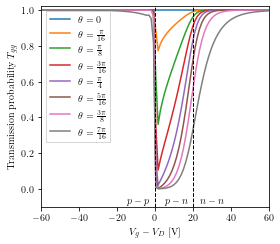

In [33]:
lam = 10e-7

kx = lambda DEF, DEFREF, theta : np.sign(DEF) * np.sqrt((DEF/(h_bar * vF))**2 - (np.sin(theta)*DEFREF/(h_bar * vF))**2) 

# kx = lambda DEF, DEFREF, theta : np.sign(DEF) * np.abs(np.cos(theta) * DEFREF/(h_bar * vF))


kapp = lambda a, b, DEFg, DEFm, theta : (DEFg - DEFm) / (h_bar * vF) + a * kx(DEFg, np.minimum(np.abs(DEFm), np.abs(DEFg)), theta) + b * kx(DEFm, np.minimum(np.abs(DEFm), np.abs(DEFg)), theta)

xx = np.linspace(0, 10) * 1e-6

profile = lambda x, DEFm, DEFg: (DEFg - DEFm) / (np.exp(-x/lam) + 1)

# plt.figure()
# plt.plot(xx, profile(xx, DEF[-1], DEFgg2[-1]))

Rstep = lambda theta : np.array([np.sinh(np.pi * lam * kapp(1, -1, DEF[i], DEFgg2[i], theta)) \
                               * np.sinh(np.pi * lam * kapp(-1, 1, DEF[i], DEFgg2[i], theta)) \
                              / (np.sinh(np.pi * lam * kapp(1, 1, DEF[i], DEFgg2[i], theta)) 
                               * np.sinh(np.pi * lam * kapp(-1, -1, DEF[i], DEFgg2[i], theta))) for i in range(Vg.size)])
# k_y = 2

# kx**2 + ky**2 = (DEF/(h_bar * vF))**2 
angg = np.arange(0, 8) * np.pi / 16

# ky =  np.sin(theta) * DEF[50]/(h_bar * vF)
plt.figure(figsize=(4, 3.5))
for theta in angg:

    plt.plot(Vg-VDgg2, 1-Rstep(theta))
    
plt.axvline(42.2 - VDgg2, linewidth=1, color='k', linestyle='dashed')
plt.axvline(0, linewidth=1, color='k', linestyle='dashed')
plt.xlim([-60,60])
plt.ylim([-0.1, 1.02])
plt.text(- 15, -0.08,'$p - p$')
plt.text(42.2- VDgg2 - 15, -0.08,'$p - n$')
plt.text(61 - VDgg2 - 15, -0.08,'$n - n$')
plt.ylabel('Transmission probability $T_{gg}$')
plt.xlabel("$V_{g}-V_{D}$ [V]")
plt.legend([r'$\theta = 0$', r'$\theta = \frac{\pi}{16}$', r'$\theta = \frac{\pi}{8}$', r'$\theta = \frac{3\pi}{16}$', \
            r'$\theta = \frac{\pi}{4}$',  r'$\theta = \frac{5\pi}{16}$',  r'$\theta = \frac{3\pi}{8}$', r'$\theta = \frac{7\pi}{16}$'])

plt.tight_layout()
plt.savefig('tgg_angle.pgf')

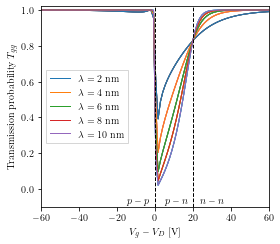

In [52]:
kx = lambda DEF, DEFREF, theta : np.sign(DEF) * np.sqrt((DEF/(h_bar * vF))**2 - (np.sin(theta)*DEFREF/(h_bar * vF))**2) 

# kx = lambda DEF, DEFREF, theta : np.sign(DEF) * np.abs(np.cos(theta) * DEFREF/(h_bar * vF))


kapp = lambda a, b, DEFg, DEFm, theta : (DEFg - DEFm) / (h_bar * vF) + a * kx(DEFg, np.minimum(np.abs(DEFm), np.abs(DEFg)), theta) + b * kx(DEFm, np.minimum(np.abs(DEFm), np.abs(DEFg)), theta)

xx = np.linspace(0, 10) * 1e-6

profile = lambda x, DEFm, DEFg: (DEFg - DEFm) / (np.exp(-x/lam) + 1)

# plt.figure()
# plt.plot(xx, profile(xx, DEF[-1], DEFgg2[-1]))

Rstep = lambda theta : np.array([np.sinh(np.pi * lam * kapp(1, -1, DEF[i], DEFgg2[i], theta)) \
                               * np.sinh(np.pi * lam * kapp(-1, 1, DEF[i], DEFgg2[i], theta)) \
                              / (np.sinh(np.pi * lam * kapp(1, 1, DEF[i], DEFgg2[i], theta)) 
                               * np.sinh(np.pi * lam * kapp(-1, -1, DEF[i], DEFgg2[i], theta))) for i in range(Vg.size)])

plt.figure(figsize=(4, 3.5))

theta = np.pi / 4
lamm = np.arange(1, 6) * 2e-7

for idx, _ in enumerate(lamm):

    lam = lamm
    plt.plot(Vg-VDgg2, 1-Rstep(theta), linewidth=1)
    
plt.axvline(42.2 - VDgg2, linewidth=1, color='k', linestyle='dashed')
plt.axvline(0, linewidth=1, color='k', linestyle='dashed')
plt.xlim([-60,60])
plt.ylim([-0.1, 1.02])
plt.text(- 15, -0.08,'$p - p$')
plt.text(42.2- VDgg2 - 15, -0.08,'$p - n$')
plt.text(61 - VDgg2 - 15, -0.08,'$n - n$')
plt.ylabel('Transmission probability $T_{gg}$')
plt.xlabel("$V_{g}-V_{D}$ [V]")
plt.legend([fr'$\lambda = {lam*1e7:.0f}$ nm' for lam in lamm], loc=6)
plt.tight_layout()

# plt.savefig('tgg_lambda.pgf')

# Classic transport
Simulation of graphene transistors with the width and length of several microns. The scattering effects are significant as the mean free path of carriers is smaller than the graphene channel length.

In [35]:
n_chi = t2**2 / (np.pi * (h_bar * vF)**2) # [carriers cm2] - in the limit of Delta/kBT >> 1

dVD = (1 * n_chi) / CG(toxch) # Dirac-Voltage variation - [V] (~3.6 V para 300n )

no = n_chi / 2;
po = n_chi / 2;

print(f"Residual spatial charge (electrons + holes -density) -> nχ = {n_chi} [carriers/cm2]")
print(f"Residual spatial charge (electrons density)-> no = {no} [carriers/cm2]")
print(f"Dirac-Voltage variation -> ΔVD = {dVD} V")

Residual spatial charge (electrons + holes -density) -> nχ = 734714598336.9059 [carriers/cm2]
Residual spatial charge (electrons density)-> no = 367357299168.45294 [carriers/cm2]
Dirac-Voltage variation -> ΔVD = 0.6817822199025563 V


### Induced electrons density in the graphene channel due to the gate voltage

In [36]:
ng = lambda Vg : CG(toxch) * (Vg) # 2D charge density  [electrons . cm-2]

### Thermally generated carriers

In [37]:
nth = lambda T : 2 * np.pi * (k_B * T / (h_bar * vF))**2 / 6

print(f"Thermally generated carriers -> nth = {nth(300)} [carriers/cm2]")

Thermally generated carriers -> nth = 161542361990.91385 [carriers/cm2]


### Carrier density in graphene at Dirac point underthermal equilibrium [Nano-CMOS and Post-CMOSElectronics, IET (2016), pag. 103]

In [38]:
nDirac = lambda T : np.sqrt(no**2 + nth(T)**2)

print(f"Carrier density in graphene at Dirac-point ->nDirac = {nDirac(300):.5e} [carrier/cm2]")

Carrier density in graphene at Dirac-point ->nDirac = 4.01307e+11 [carrier/cm2]


### Total density of electrons and holes [Nano-CMOS and Post-CMOS Electronics PRB, (2009)]

In [39]:
ne = lambda Vgate, T : .5 * (-ng(Vgate) + np.sqrt(ng(Vgate)**2 + nDirac(T)**2))
ph = lambda Vgate, T : .5 * (ng(Vgate) + np.sqrt(ng(Vgate)**2 + nDirac(T)**2))

neh = lambda Vgate, T : ne(Vgate, T) + ph(Vgate, T)

print(f"Total density of electrons -> ne = {ne(0, 300)} [e/cm2]")
print(f"Total density of holes -> ph = {ph(0, 300)} [h/cm2]")
print(f"Total carriers density -> neh = {neh(0, 300)} [h/cm2]")

x = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(x, neh(x, 100), label=f"$T={100}$ [K]")
plt.plot(x, neh(x, 500), label=f"$T={500}$ [K]")
plt.plot(x, neh(x, 1000), label=f"$T={1000}$ [K]")
plt.title('Total density of electrons and holes')
plt.xlabel('Vg [V]')
plt.ylabel(r'Carrier density [#/cm$^{2}$]')
plt.grid()
plt.legend()
plt.show()

Total density of electrons -> ne = 200653507301.73126 [e/cm2]
Total density of holes -> ph = 200653507301.73126 [h/cm2]
Total carriers density -> neh = 401307014603.4625 [h/cm2]


RuntimeError: latex was not able to process the following string:
b'Carrier density [#/cm$^{2}$]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.3) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(C:/Users/simon/.matplotlib/tex.cache/e1d4e3b75628400e6c1b0b638264a93a.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\size10.clo))
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/type1cm\type1cm.sty
)
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/cm-super\type1ec.st
y (C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\t1cmr.fd))
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\inputenc.sty)
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/geometry\geometry.s
ty
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/graphics\keyval.sty
)
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/generic/iftex\ifvtex.sty
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/generic/iftex\iftex.sty))

(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/geometry\geometry.c
fg))
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/base\textcomp.sty)
(C:\Users\simon\AppData\Local\Programs\MiKTeX 2.9\tex/latex/l3backend\l3backend
-dvips.def)
No file e1d4e3b75628400e6c1b0b638264a93a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.19 {\rmfamily Carrier density [#
                                  /cm$^{2}$]}
No pages of output.
Transcript written on e1d4e3b75628400e6c1b0b638264a93a.log.




<Figure size 432x288 with 1 Axes>

## Resistance - Graphene channel
### Mobility in graphene on SiO2

- Phonon scattering - Acoustic phonon -Optical phonon - Surface polar phonons μo = 29.000 cm2/V.s lattice vibrations are an intrinsic source of electron–phonon scattering and dominate the extrinsic scattering mechanisms at finite temperature and limit the carrier mobility in graphene
- Long-range scattering Coulomb - because of trapped charges in the graphenesubstrate interface - degradation of the mobility, shift of Dirac point, and increase in the minimum conductivity plateau width
- Lattice imperfections, edge roughness, and point defects are intrinsic sources of shortrange scattering in graphene sheets

In [40]:
mu_0 = 4650 # [cm^2 / (V . s)] # experimental parameter
nref = 1.1e13 # [cm-3]
Tref = 300 # [K]
alpha_mu = 2.2
beta_mu = 3.0

In [41]:
mu_sio2 = lambda n, T : mu_0 / ((1 + (n / nref)**(alpha_mu)) * (1 + (T/Tref - 1)**(beta_mu)))

### Saturation Velocity [Appl. Phys. Lett. 97, 082112 (2010)/Nano-CMOS and Post-CMOS Electronics, IET (2016), pag. 109]

In [42]:
w_opm = 0.081 / h_bar

print(w_opm)

N_opm = lambda T : 1 / (np.exp((h_bar * w_opm) / (k_B * T)) - 1) # phonon occupation

print(N_opm(300))
print(neh(0, 300))
print(vF**2)

vsat = lambda Vgate, T : (2 / np.pi) * (w_opm / np.sqrt(np.pi * neh(Vgate, T))) \
        * np.sqrt(1 - (w_opm**2 / (4 * np.pi * neh(Vgate, T) * vF**2))) / (1 + N_opm(T))

print(vsat(0, 300))

123060674112790.53
0.04556292565803286
401307014603.4625
1e+16
55820353.852790065


In [43]:
gamma = 2

Vdrif = lambda Vgate, Vd, L, T, x : mu_sio2(neh(Vgate, T), T) * (Vd / L) / \
        (1 + ( mu_sio2(neh(Vgate, T), T) * Vd / (vsat(Vgate, T) * L) )**gamma)**(1/gamma)

### Current ($I_{DS}$) in the graphene channel (charge-collection model) 

In [44]:
Ids = lambda Vgate, Vd, T, W, L : qel * (W / L) * \
        integrate.quad(lambda x : neh(Vgate, T) * Vdrif(Vgate, Vd, L, T, x), 0, L)[0]

print(f'Current in the graphene channel Ids = {Ids(25, 1, 300, 10e-4, 10e-4)} [A]')

Current in the graphene channel Ids = 0.002448874319090831 [A]


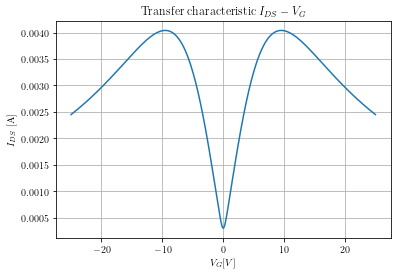

In [45]:
Vgate = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(Vgate, [Ids(Vg, 1, 300, 10e-4, 10e-4) for Vg in Vgate])
plt.title('Transfer characteristic $I_{DS}-V_{G}$')
plt.xlabel('$V_{G} [V]$')
plt.ylabel('$I_{DS}$ [A]')
plt.grid()

In [46]:
RGr = lambda Vgate, Vd, T, W, L : Vd / Ids(Vgate, Vd, T, W, L) # Ohms

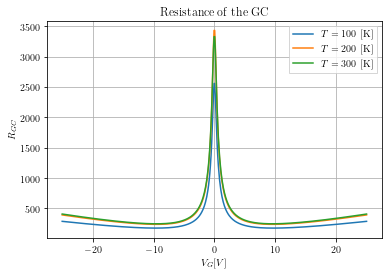

In [47]:
Vgate = np.linspace(-25, 25, 500)
plt.figure()
plt.plot(Vgate, [RGr(Vg, 1, 100, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=100$ [K]')
plt.plot(Vgate, [RGr(Vg, 1, 200, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=200$ [K]')
plt.plot(Vgate, [RGr(Vg, 1, 300, 10e-4, 10e-4) for Vg in Vgate], label=r'$T=300$ [K]')
plt.title('Resistance of the GC')
plt.xlabel(r'$V_{G} [V]$')
plt.ylabel(r'$R_{GC}$')
plt.grid()
plt.legend()

### Device - Resistance of the graphene channel + Contact Resistance (ideal metal - graphene junction)

In [48]:
RDT = lambda Vgate, Vd, T, W, L : RGr(Vgate, Vd, T, W, L) + RctGF(Vgate, W) # Device - Total resistance Ohms

In [49]:
# Device geometry

L = 1
W = 1

Vgate = np.linspace(-25, 25, 500)

RDT0 = [RDT(Vg, 1, 100, W, L) for Vg in Vgate]
RDT1 = [RDT(Vg, 1, 200, W, L) for Vg in Vgate]
RDT2 = [RDT(Vg, 1, 300, W, L) for Vg in Vgate]

TypeError: <lambda>() takes 1 positional argument but 2 were given

In [ ]:
plt.figure()
plt.plot(Vgate, RDT0, label=r'$T=100$ [K]')
plt.plot(Vgate, RDT1, label=r'$T=200$ [K]')
plt.plot(Vgate, RDT2, label=r'$T=300$ [K]')
plt.title('Total resistance of the device')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'Total resistance [$\Omega$]')
plt.grid()

### Device - Total current (Ids) charge-collection model 

In [ ]:
IDT = lambda Vg, Vd, T, W, L : Vd / RDT(Vgate, Vd, T, W, L) # Device total current [Amps]

Vd = 1

IDT0 = Vd / np.asarray(RDT0)
IDT1 = Vd / np.asarray(RDT1)
IDT2 = Vd / np.asarray(RDT2)

In [ ]:
plt.figure()
plt.plot(Vgate, IDT0*1e3, label=r'$T=100$ [K]')
plt.plot(Vgate, IDT1*1e3, label=r'$T=200$ [K]')
plt.plot(Vgate, IDT2*1e3, label=r'$T=300$ [K]')
plt.title(r'Total current $I_{DS}$, charge-collection model')
plt.xlabel(r'$V_{G}$ [V]')
plt.ylabel(r'$I_{DS}$ [mA]')
plt.legend()
plt.grid()